#Breve introdução teórica



## Motivação

A ideia principal do método word2vec é encontrar uma representação vetorial para palavras, tal representação elaborada a partir do contexto em que essas palavras aparecem. No caso deste pacote, os modelos são treinados com um corpo de texto extraído do meio jurídico.

A representação de palavras em espaços vetoriais torna possível a análise de proximidade semântica, correlação e outras comparações quantitativas entre palavras.

Os artigos originais sobre word2vec podem se encontrados em [[1]](https://arxiv.org/abs/1301.3781) e [[2]](https://papers.nips.cc/paper/2013/hash/9aa42b31882ec039965f3c4923ce901b-Abstract.html).

## A representação vetorial

A partir do corpo de texto (o conjunto de todos os textos usados para treinar o modelo) será coletado um conjunto com as $n$ palavras distintas, formando o "vocabulário". Com isso podemos ter uma representação vetorial rústica de cada palavra do vocabulário, na forma conhecida como "one-hot vector", que consiste em um vetor de tamanho $n$ preenchido inteiramente com zeros, exceto na posição utilizada para diferenciar cada palavra do vocabulário, com o número um nessa posição.



As representações vetoriais (as chamadas "*word embbedings*") geradas a partir do Word2Vec, podem ter uma dimensão arbitrária e carregam informações geradas a partir do contexto. O contexto é definido por um conjunto de palavras dentro de cada amostra, o tamanho desse conjunto é dado pela "janela", ou seja, o número de palavras ao redor da palavra principal.

Em suma, os modelos W2V podem ser gerados de duas formas: o método "*Skip-Gram*" e o método "*Continuous Bag of Words*" (CBOW). Os modelos gerados a partir do método *Skip-Gram* consistem de *embbedings* que representam o espaço paramétrico de uma Rede Neural, que recebe como *input* a palavra $w_t$, ou seja, na posição $t$, e tem como *output* prever as palavras $w_{t-d}$, ..., $w_{t-2}$, $w_{t-1}$ e $w_{t+1}$, $w_{t+2}$, ..., $w_{t+d}$, onde $d$ é o tamanho da janela. Já os modelos gerados a partir do método CBOW fazem o processo inverso, usando o contexto de palavras dentro da janela para prever a palavra alvo $w_t$. As palavras são representadas como "one-hot vectors" durante o treinamento.

## Aplicações imediatas

Sejam $v_1$ e $v_2$ vetores *one-hot vectors* é imediato que $<v_1, v_2> = 0$, ou seja, nesta representação, todos os vetores são ortogonais. Pouca informação pode se tirar disso, pois a reprsentação em *one-hot vector* não considera o contexto, está ligada somente a frequêcia de ocorrencia das palavras.

Operações vetoriais como a soma e subtração entre vetores em word2vec operam como "somas semânticas", por exemplo, uma equação como $(rei - homem) + mulher = rainha$ seria algo palpável, que dependeria do contexto que essas palavras são usadas no corpo de texto. 

Além disso, podemos agora ter uma visualização gráfica das palavras que leva em conta o contexto em que essas palavras geralmente são usadas no corpo de texto. Vamos dar um exemplo, utilizando *embbedings* de tamanho 100, e aplicando um PCA para reduzir a dimensionalidade para 2, para visualizarmos as palavras em um gráfico bidimensional.

# Representando palavras utilizando Word2Vec

In [1]:
!pip install gensim==3.8.1
!pip install git+https://github.com/legalnlp21/legalnlp

     |████████████████████████████████| 24.2 MB 78 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
  Cloning https://github.com/legalnlp21/legalnlp to /tmp/pip-req-build-j1rn26rt
  Running command git clone -q https://github.com/legalnlp21/legalnlp /tmp/pip-req-build-j1rn26rt
     |████████████████████████████████| 64 kB 2.8 MB/s 
  Created wheel for legalnlp: filename=legalnlp-1.0.0-py3-none-any.whl size=4884 sha256=ce0eb49ccbd6d37811e8f28c1d4dbc194b820c95cfbf1a3b2fc8e3ce196d9535
  Stored in directory: /tmp/pip-ephem-wheel-cache-p9ln2sxn/wheels/c9/d2/d7/488d600060896523461cecc4d9f49eec4efc02d494d7f04b62
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=4a4c84e3e2063e90a3885b905d913dfd8c6baeb42d1f421eaff1067002238743
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for wget:

In [14]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from gensim.models import KeyedVectors
import pandas as pd
from legalnlp.get_premodel import get_premodel

In [6]:
# Downloading pre-trained model
get_premodel('wdocdm')

In [7]:
model = KeyedVectors.load("/content/W2V-D2V/w2v_d2v_dm_size_100_window_15_epochs_20")

In [8]:
model.wv.most_similar('jurisprudencia')

[('jurisprudência_assente', 0.6141901016235352),
 ('iterativa_jurisprudência', 0.5145410895347595),
 ('jurisprudência_majoritária', 0.5138000249862671),
 ('jurisprudência', 0.5029575824737549),
 ('jurisprudência_pátria', 0.4976961016654968),
 ('notória_jurisprudência', 0.49725937843322754),
 ('jurisprudência_uníssona', 0.47410157322883606),
 ('dominante', 0.4658571481704712),
 ('vazada', 0.4633045792579651),
 ('jurisprudência_prevalecente', 0.45525240898132324)]

In [9]:
model.wv.most_similar('pandemia')

[('pandemia_mundial', 0.6916313767433167),
 ('pandemia_causada', 0.6867375373840332),
 ('epidemia', 0.6704655885696411),
 ('disseminação', 0.6358423233032227),
 ('pandemia_global', 0.5988448858261108),
 ('pandemia_provocada', 0.5955021381378174),
 ('quarentena', 0.595090389251709),
 ('surto', 0.588540256023407),
 ('crise', 0.5628268718719482),
 ('calamidade_pública', 0.541213870048523)]

In [ ]:
def pca_plot(model, p_c, pca, file = None):
    "Creates and TSNE model and plots it"
    
    transforma = lambda palavra: pca.transform(palavra)
    
    plt.figure(figsize=(13, 8)) 
    wd_clusters = p_c.keys()


    for word in wd_clusters:
      labels = []
      tokens = []
      emb = model.wv[word]
      emb = (emb/np.sqrt(emb@emb)).tolist()
      tokens.append(emb)
      labels.append(word)
      
      k = 0
      for similar in model.wv.most_similar(word):
        k+=1
        emb = model.wv[similar[0]]
        emb = (emb/np.sqrt(emb@emb)).tolist()
        tokens.append(emb)
        labels.append(similar[0])
        if k == 5: break
        
        
      new_values = transforma(np.array(tokens))

      x = []
      y = []

      for value, i in zip(new_values, [k for k in range(0, len(labels))]):
        norma = 1#np.sqrt(value[0]**2 + value[1]**2)
        x.append(value[0]/norma)
        y.append(value[1]/norma)
            
      for i in range(len(x)):
          plt.scatter(x[i],y[i], c = p_c[word], s=50)
          plt.annotate(labels[i],
                      xy=(x[i], y[i]),
                      xytext=(5, 2),
                      fontsize = 10,
                      textcoords='offset points',
                      ha='right',
                      va='bottom')

    ln = []
    for i in range(len(p_c.items())):
      ln.append(mpatches.Patch(color= list(p_c.values())[i], label= list(p_c.keys())[i])) 

    plt.xlabel('PC1 ('+str(round(pca.explained_variance_ratio_[0]*100,2))+'%)', size=12)
    plt.ylabel('PC2 ('+str(round(pca.explained_variance_ratio_[1]*100,2))+'%)', size=12)
    plt.legend(handles=ln)
    if type(file) is not None:
      plt.savefig(file, dpi = 800)
    plt.show()

In [ ]:
pca = PCA(n_components = 2)
emb_norm = model.wv.vectors/(np.sqrt(np.sum(model.wv.vectors**2, axis = 1))).reshape((-1,1))
pca.fit(emb_norm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([0.04819769, 0.0352971 ])

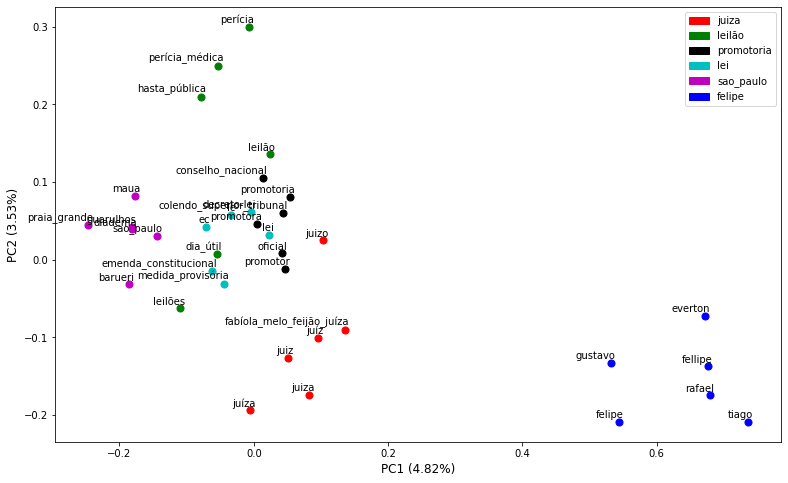

In [ ]:
palavras = {'juiza':'r', 'leilão':'g', 'promotoria':'k', 'lei':'c', 'sao_paulo':'m', 'felipe':'b'}

pca_plot(model, p_c = palavras, pca = pca, file = "clusters_w2v")


In [ ]:
model.wv.similar_by_vector(model.wv['juiz'] - model.wv['homem'] + model.wv['mulher']) 

[('juiz', 0.7888278365135193),
 ('juíza', 0.686109185218811),
 ('juiza', 0.5686846971511841),
 ('desembargador', 0.5542982816696167),
 ('mmª_juíza', 0.5234751105308533),
 ('juíz', 0.5179819464683533),
 ('vara', 0.457878053188324),
 ('juízo', 0.45668891072273254),
 ('luciano_paschoeto_juiz', 0.4465649127960205),
 ('gustavo_jaques_juiz', 0.4322155714035034)]

In [ ]:
model.wv.most_similar("comarca")

[('cidade', 0.5767845511436462),
 ('município', 0.5658520460128784),
 ('maio', 0.524922251701355),
 ('unidade', 0.49411553144454956),
 ('junho', 0.47899821400642395),
 ('zona_franca', 0.47484683990478516),
 ('comarcade', 0.46650949120521545),
 ('arquidiocese', 0.46391820907592773),
 ('circunscrição_judiciária', 0.45635128021240234),
 ('penitenciária_feminina', 0.4507617950439453)]

In [ ]:
model.wv.most_similar("acusado")

[('denunciado', 0.8733181953430176),
 ('indiciado', 0.8611713647842407),
 ('acusada', 0.7796086668968201),
 ('flagranteado', 0.7711815237998962),
 ('investigado', 0.7626327276229858),
 ('sentenciado', 0.7151278853416443),
 ('apenado', 0.7086013555526733),
 ('querelante', 0.6786249279975891),
 ('corréu', 0.6765390038490295),
 ('reeducando', 0.6669836044311523)]

In [ ]:
model.wv.most_similar("juiz")

[('juíza', 0.8210258483886719),
 ('juiza', 0.7306275367736816),
 ('juíz', 0.691645085811615),
 ('juízo', 0.6605231165885925),
 ('magistrado', 0.6213295459747314),
 ('mmª_juíza', 0.5510469675064087),
 ('juizo', 0.5494943261146545),
 ('desembargador', 0.5313084721565247),
 ('mmjuiz', 0.5277603268623352),
 ('fabíola_melo_feijão_juíza', 0.5043971538543701)]

In [ ]:
model.wv.most_similar("tribunal")

[('egrégio_conselho', 0.7943153381347656),
 ('procuradoria', 0.7524194121360779),
 ('etribunal', 0.7123366594314575),
 ('pavuna', 0.7041512131690979),
 ('conselho', 0.6917230486869812),
 ('esta_egrégia_corte', 0.6803465485572815),
 ('egrégia_corte', 0.6772338151931763),
 ('leopoldina', 0.6732379794120789),
 ('madureira', 0.6661229133605957),
 ('corte', 0.642699122428894)]

In [ ]:
model.wv.most_similar("promotoria")

[('promotor', 0.7750422954559326),
 ('oﬁcial', 0.7610885500907898),
 ('colendo_superior_tribunal', 0.7528207898139954),
 ('promotora', 0.7323068380355835),
 ('conselho_nacional', 0.7043092250823975),
 ('segredo', 0.6899466514587402),
 ('oficial', 0.6839830875396729),
 ('oficiala', 0.6804943084716797),
 ('gratuita', 0.6527319550514221),
 ('palácio', 0.638442873954773)]

In [ ]:
model.wv.most_similar("direito")

[('direito_subjetivo', 0.6552778482437134),
 ('retratação', 0.5924602150917053),
 ('admissibilidade', 0.542267918586731),
 ('registro', 0.5354086756706238),
 ('dedireito', 0.5270605683326721),
 ('direito_marcelo_badaró', 0.5239690542221069),
 ('retratação_exercido', 0.5215996503829956),
 ('seus_quadros_funcionais', 0.5082097053527832),
 ('singular', 0.50741046667099),
 ('mero_peticionamento', 0.49530357122421265)]

In [ ]:
model.wv.similarity("stf", "supremo")

0.43851084

In [ ]:
model.wv.similarity("juiz", "promotoria")

-0.044675205

In [ ]:
model.wv.most_similar('presidente')

[('egrégio', 0.5883347392082214),
 ('presidência', 0.559654176235199),
 ('júri', 0.533455491065979),
 ('regimento_interno', 0.5065801739692688),
 ('eg', 0.4995988607406616),
 ('site', 0.4954540729522705),
 ('tabela_prática', 0.4650864601135254),
 ('pleno', 0.4607575237751007),
 ('supressão', 0.46034979820251465),
 ('conclusão_adotada', 0.45636212825775146)]

In [ ]:
model.wv.similarity("presidente", "plenário")

0.24541123

In [ ]:
model.wv.most_similar('stj')

[('tst', 0.7337415218353271),
 ('ctst', 0.7298643589019775),
 ('-stj', 0.7196532487869263),
 ('colendo_tst', 0.7124598026275635),
 ('tjrj', 0.6958931088447571),
 ('cstj', 0.668242871761322),
 ('tfr', 0.6673515439033508),
 ('tjpe', 0.6542514562606812),
 ('stf', 0.6405160427093506),
 ('tjerj', 0.6238747239112854)]

# Aplicando o Word2Vec em um dataset real

Nesse tutorial vamos demonstrar como utilizar word-embeddings geradas a partir do método Word2Vec, em cima de um corpo de texto do meio jurídico.

O método Word2Vec utiliza o contexto das palavras nos textos para gerar as embbedings. Para isso, foi utilizado o pacote *gensim* (versão 3.6.0), que integra as ferramentas necessárias para gerar, salvar e carregar as embbedings.

As ferramentas de limpeza de texto usadas foram criadas com o enfoque em textos do meio jurídico, mas podem ser usadas com outros textos igualmente. 

Para o funcionamento correto, recomendamos que o usuário tenha acesso aos seguintes módulos:
* ScikitLearn
* Keras
* Gensim
* String
* Numpy
* Pandas
* Ftfy

Neste tutorial, faremos um modelo de Redes Neurais Convolucionais para classificar processos legais em "Ativo", "Suspenso" e "Arquivado". O dataset esta disponível
[nesta página](https://www.kaggle.com/felipepolo/brazilian-legal-proceedings)
do Kaggle. \\
Este turorial foi baseados nos seguintes artigos 
[[3]](https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/), [[4]](https://machinelearningmastery.com/best-practices-document-classification-deep-learning/) e [[5]](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

De início, vamos importar as bibliotecas e funções que serão usadas adiante. Devemos também instalar as bibliotecas que não estão disponíveis por padrão no Google Colab.

In [35]:
!pip install ftfy

import pandas as pd

import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping

!pip install gensim==3.8.1
from gensim.models import KeyedVectors

from string import punctuation

from os import listdir

from numpy import array
from numpy import asarray
from numpy import zeros

!pip install git+https://github.com/legalnlp21/legalnlp
from legalnlp.clean_functions import *


  Cloning https://github.com/legalnlp21/legalnlp to /tmp/pip-req-build-bryazwu5
  Running command git clone -q https://github.com/legalnlp21/legalnlp /tmp/pip-req-build-bryazwu5


Célula de comando para fazer o download do modelo Word2Vec pré-treinado.

In [10]:
# To download pre- trained model use get_premodel('wdocdm'). We already downloaded it in the begin of notebook

## Carregando os dados

Nosso dataset esta em formato *json*. Para ficar em um formato mais conveniente, vamos transpor o dataset.

In [36]:
df = pd.read_json("https://github.com/legalnlp21/legalnlp/blob/main/demo/Word2Vec/labeled.json?raw=true").transpose()
df.head()

,label,texts
0,H:Arquivado,{'-1': 'Tipo do Movimento:Ato Ordinatório Prat...
1,H:Ativo,"{'-1': 'Tipo do Movimento:Recebimento ', '-2':..."
2,H:Ativo,{'-1': 'Tipo do Movimento:RemessaDestinatário:...
3,H:Arquivado,{'-1': 'Tipo do Movimento:Arquivamento Tipo de...
4,H:Arquivado,{'-1': 'Tipo do Movimento:Arquivamento Tipo de...


In [37]:
df.shape

(6449, 2)

O dataset é composto por um conjunto de 6449 processos classificados nas 3 categorias:
* Ativo
* Suspenso
* Arquivado

Para esse tutorial, iremos apenas utilizar os textos indexados com '-1'. Vamos usar a função "clean" em cada um dos textos.

In [38]:
from legalnlp.clean_functions import *
X_textos = df.texts[:].apply(lambda dict: clean(dict['-1']))

X_textos.head()

0    tipo do movimento : ato ordinatório praticado ...
1                      tipo do movimento : recebimento
2    tipo do movimento : remessadestinatário : trib...
3    tipo do movimento : arquivamento tipo de arqui...
4    tipo do movimento : arquivamento tipo de arqui...
Name: texts, dtype: object

Agora faremos a separação das categorias da nossa target, numerando de 0 a 2.

In [39]:
def converte_label(label):
  if label == "H:Ativo": return 0
  elif label == "H:Suspenso": return 1
  else: return 2
labels = np.array(df.label[:].apply(converte_label))

In [40]:
labels[:5]

array([2, 0, 0, 2, 2])

Com isso feito, podemos tratar nossos dados para que a rede possa interpreta-los e trabalhar de forma adequada.

## Preparando os dados

O dataset que estamos usando não precisou de muito tratamento. Para as próprias aplicações, o leitor deve verificar com cautela as peculiaridades dos dados, antes de realizar a tokenização.

Com nossos textos tratados, vamos começar a prepará-los para serem recebidos pela rede neural. A estrutura basica da rede neural para NLP deve iniciar com uma camada chamada de "embedding layer". Essa camada é a responsável por traduzir as palavras para vetores. Ela fara isso a partir de uma matriz de pesos, onde cada i-ésima linha contém o vetor referente a i-ésima palavra.

Portanto, devemos indexar cada palavra a um número inteiro, e representar nossos textos como vetores de indexação, ou seja, vetores com os números inteiros referentes a cada palavra. Para isso vamos tokenizar nosso corpo de texto utilizando o objeto *Tokenizer* do Keras. 

In [41]:
t = Tokenizer()
t.fit_on_texts(X_textos)
tamanho_vocab = len(t.word_index) + 1
encoded_textos = array(t.texts_to_sequences(X_textos))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
t.index_word[8], t.index_word[4], t.index_word[39], t.index_word[59], t.index_word[120], t.index_word[185], "..."

('tipo', 'do', 'movimento', 'ato', 'ordinatório', 'praticado', '...')

In [ ]:
print(encoded_textos[0])

[8, 4, 39, 59, 120, 185, 138, 75, 36, 95, 94, 61, 168, 241, 462, 2, 80, 1, 45, 349, 528, 613, 212, 1414, 683, 1415, 36, 684, 685]


Cada vetor agora representa um texto, contúdo, cada um pode ter tamanhos distintos. Devemos padroniza-los, completando os textos menores com "0" até que cheguem no tamanho do maior texto dos dados.

In [ ]:
len_maior = 0
for lista in encoded_textos:
  if len(lista) > len_maior: len_maior = len(lista)

len_maior

306

Vamos usar a função "pad_sequences" do Keras para ajustar o tamanho dos textos para 306. Além disso, é recomendável que passemos os índices para "float".

In [ ]:
padded_docs = pad_sequences(encoded_textos, maxlen=len_maior, padding='post').astype('float32')

len(padded_docs[0])

306

Nossos textos estão prontos para serem recebidos pela rede neural, contudo, ainda é necessário gerar a camada de embbeding da rede. Faremos isso na próxima seção.

Também devemos tratar o nosso vetor de categorias. Por padrão, nossa target deve estar em formato matricial, com 1 na coluna representante da categoria do texto daquela linha e 0 nas demais.

Vamos usar o objeto "OneHotEncoder" do ScikitLearn e passar a matriz para a forma densa (objeto retorna na forma de matriz esparça). 

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
label_onehot = encoder.fit_transform(labels.reshape((-1,1))).todense()

label_onehot[:3]

matrix([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])

Agora, com nossos dados preparados, começaremos a cuidar da "embbeding layer". 

## Preparando as embeddings

Primeiramente, vamos importar o modelo Word2Vec treinado. Este modelo tem suas embbedings de tamanho 100 e foi treinado usando uma janela de tamanho 15 e "epochs" = 20. Vamos usar o objeto KeyedVectors do *Gensim* para carregar o model.

In [42]:
model = KeyedVectors.load("/content/W2V-D2V/w2v_d2v_dm_size_100_window_15_epochs_20")

Com o modelo carregado, já podemos estruturar a matriz de pesos. Neste caso específico, todas as palavras do corpo de texto dos dados estão contidas no vocabulário do modelo Word2Vec, contudo, o leitor deve ter o cuidado de tratar os casos em que essa equivalência não aconteça.

Vamos estruturar um dicionário, no qual cada chave é uma palavra do corpo do vocabulário do modelo e cada valor representa sua embbeding.

In [43]:
wv_dict = dict(zip(model.wv.index2word[:], model.wv.vectors[:]))

Para acelerar o treino da rede, e diminuir o tamanho da matriz de pesos, podemos fazer um dicionário somente com as palavras do texto, pois geralmente, o vocabulário do modelo Word2Vec é muito mais extenso que o necessário. 

In [ ]:
wv_dict_updated = {}
for palavra in t.index_word.values():
  if palavra in wv_dict.keys():
    wv_dict_updated[palavra] = wv_dict[palavra]

Por fim, podemos estruturar a matriz de pesos, colocando a palavra de i-ésimo índice na i-ésima linha da matriz.

In [ ]:
matriz_de_pesos = zeros((tamanho_vocab, 100))
for palavra, i in t.word_index.items():
  vetor_embed =  wv_dict_updated.get(palavra)
  if vetor_embed is not None:
    matriz_de_pesos[i] = vetor_embed

matriz_de_pesos.shape

(2827, 100)

## Treinando o modelo

Com nossos dados codificados, e nossa matriz de pesos pronta, podemos começar a estruturar nossa Rede Neural. Nosso modelo será uma Rede Neural Convolucional, ou seja, aplicaremos uma camada de filtragem e em seguida uma camada de pooling, buscando ressaltar informações importantes das embbedings. 

Nossa rede terá a seguinte estrutura:
1. A primeira camada de embbeding, que fara a codificação das palavras (representadas como índices) nos seus respectivos vetores.
2. A segunda será uma camada convolucional, com 128 filtros no output, kernel de tamanho 5 e função de ativação 'ReLU'.
3. A terceira camada será a MaxPooling de tamanho 2.
4. Como o output da 3ª camada é um tensor, a quarta camada será uma camada de "achatamento".
5. Por fim, a camada do output, de tamanho 3 e função de ativação *softmax*.

In [ ]:
emb = Embedding(tamanho_vocab, 100, weights = [matriz_de_pesos], input_length=len_maior, trainable = False)

rede = Sequential()

rede.add(emb)
rede.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
rede.add(MaxPooling1D(pool_size=2))
rede.add(Flatten())
rede.add(Dense(3, activation='softmax'))

Para terminar a estrutura da rede, vamos usar a função perda como 'categorical_crossentropy', o caso categórico da entropia cruzda, para o otimizador ultilizaremos o 'adam' e a métrica de avaliação será a acurácia. Podemos ver a arquitetura utilizando o método "*Sequential().summary()*".

In [ ]:
rede.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(rede.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 306, 100)          282700    
_________________________________________________________________
conv1d (Conv1D)              (None, 302, 128)          64128     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 151, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 19328)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 57987     
Total params: 404,815
Trainable params: 122,115
Non-trainable params: 282,700
_________________________________________________________________
None


Vamos separar nossos dados em dados de treino e teste.

In [ ]:
n = 4500
#X_treino, X_teste, Y_treino, Y_teste = padded_docs[:n], padded_docs[n:], label_onehot[:n], label_onehot[n:]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(padded_docs, label_onehot, random_state=42, train_size=0.7, test_size=0.3)

Por fim, podemos treinar o modelo e verificar nossos resultados. 

In [ ]:
rede.fit(X_treino, Y_treino, epochs=50, validation_split=0.1, batch_size=500, verbose=1,  callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

Epoch 1/50
9/9 [==============================] - 24s 992ms/step - loss: 1.0790 - accuracy: 0.5855 - val_loss: 0.8033 - val_accuracy: 0.7566
Epoch 2/50
9/9 [==============================] - 8s 927ms/step - loss: 0.7277 - accuracy: 0.7698 - val_loss: 0.6682 - val_accuracy: 0.7898
Epoch 3/50
9/9 [==============================] - 8s 923ms/step - loss: 0.5366 - accuracy: 0.8027 - val_loss: 0.5537 - val_accuracy: 0.8053
Epoch 4/50
9/9 [==============================] - 8s 920ms/step - loss: 0.4562 - accuracy: 0.8270 - val_loss: 0.5278 - val_accuracy: 0.7942
Epoch 5/50
9/9 [==============================] - 8s 924ms/step - loss: 0.4319 - accuracy: 0.8305 - val_loss: 0.4843 - val_accuracy: 0.8053
Epoch 6/50
9/9 [==============================] - 8s 931ms/step - loss: 0.3906 - accuracy: 0.8447 - val_loss: 0.4628 - val_accuracy: 0.8407
Epoch 7/50
9/9 [==============================] - 8s 922ms/step - loss: 0.3807 - accuracy: 0.8657 - val_loss: 0.4477 - val_accuracy: 0.8407
Epoch 8/50
9/9 [===

In [ ]:
loss, acc_treino = rede.evaluate(X_treino, Y_treino, verbose=0)
loss2, acc_teste = rede.evaluate(X_teste, Y_teste, verbose=0)
print(f'Acurácia no treino: {round(acc_treino*100, 2)}%')
print(f'Acurácia no teste: {round(acc_teste*100, 2)}%')

Acurácia no treino: 89.14%
Acurácia no teste: 84.75%


In [ ]:
predict = rede.predict(X_teste)

In [ ]:
predict1 = np.argmax(predict, axis=1)

Y_teste1 = np.argmax(Y_teste, axis=1)
np.array(Y_teste1.reshape(1,-1))[0]

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
print(classification_report(Y_teste1, predict1, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       901
           1       0.91      0.55      0.68       140
           2       0.89      0.81      0.85       894

    accuracy                           0.85      1935
   macro avg       0.87      0.76      0.80      1935
weighted avg       0.85      0.85      0.84      1935



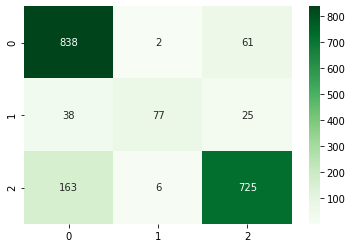

In [ ]:
cm = confusion_matrix(Y_teste1, predict1)
sns.heatmap(cm , fmt=".3g", annot= True, cmap="Greens")

plt.show()

Como a distância entre o score de treino e teste não é tão grande, e ambos performaram bem, podemos dizer que nosso modelo teve uma boa performance no geral. 

Uma analise mais aprofundada nos dados e na arquitetura da rede poderia levar a performances ainda melhores. Essas análises no entanto fogem do escopo deste tutorial, contudo, encorajamos o leitor a elaborar modelos que performem ainda melhor, e a realizar uma análise e engenharia de dados ainda mais aprofundada. 

Esperamos ter ajudado. 

:D

#Referências

[1] Mikolov, T., Chen, K., Corrado, G., and Dean, J. (2013a).  Efficient estimation ofword representations in vector space.arXiv preprint arXiv:1301.3781. \\
[2] Mikolov,  T.,  Sutskever,  I.,  Chen,  K.,  Corrado,  G. S.,  and Dean,  J. (2013b).   Distributed representations of words and phrases and their compositionality.  In Advances in neural information processing systems, pages 3111–3119. \\
[3] Brownlee Jason(2017). https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/ - acesso em: 04/08/2021.  \\
[4] Brownlee Jason(2017). https://machinelearningmastery.com/best-practices-document-classification-deep-learning/ - acesso em: 04/08/2021.  \\
[5] Brownlee Jason(2017). https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/ - acesso em: 04/08/2021. \\